In [68]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import utils
from pathlib import Path
from pprint import pprint
from importlib import reload
from tqdm import tqdm

Processing source: hongloumeng


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


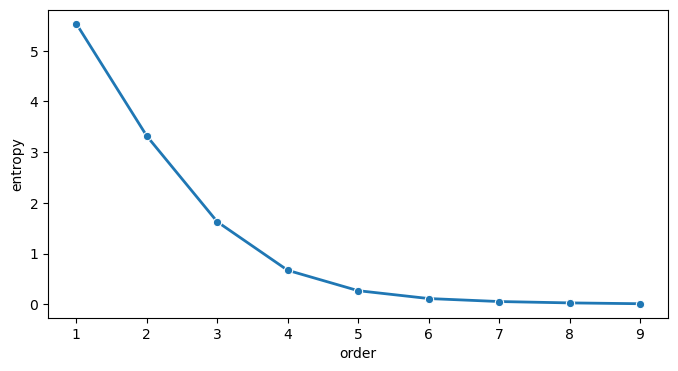

In [ ]:
reload(utils)
# quick test
level = "char"  # "char" or "word"
keep_punct = False
white_space = True
orders = list(range(1, 10))

source, path = (
    "hongloumeng",
    "data/cn/hongloumeng.txt"
)
# source, ptah = "en", "data/all_en.txt",

print(f"Processing source: {source}")
raw_text = utils.load_text(path)
tokens = utils.clean_text(
    raw_text, level=level, keep_punctuation=keep_punct, keep_whitespace=white_space, lang='cn'
)

rows = []
for order in tqdm(orders):
    counts = utils.build_ngram_counts(tokens, order, show_pb=False, print_stats=False)
    model = utils.normalize_to_probs(counts)
    h_model = utils.calculate_entropy_from_counts(counts)

    rows.append(
        {
            "source": source,
            "order": order,
            "entropy": h_model,
        }
    )
df_res_char = pd.DataFrame(rows).sort_values(["source", "order"]).reset_index(drop=True)
plt.figure(figsize=(8, 4))
sns.lineplot(
    data=df_res,
    x="order",
    y="entropy",
    marker="o",
    linewidth=2,
)
plt.show()

Processing source: hongloumeng


100%|██████████| 9/9 [00:05<00:00,  1.77it/s]


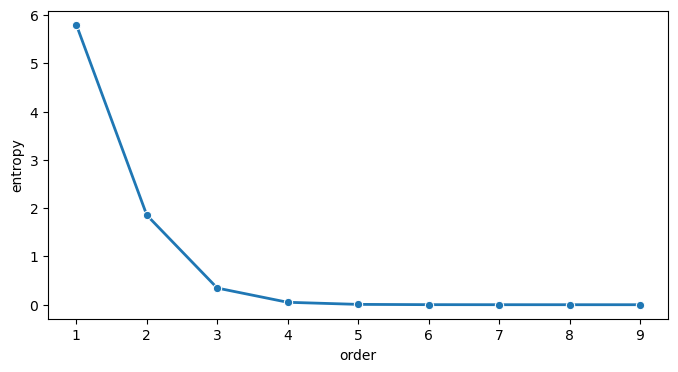

In [ ]:
reload(utils)
# quick test
level = "word"  # "char" or "word"
keep_punct = False
white_space = True
orders = list(range(1, 10))

source, path = (
    "hongloumeng",
    "data/cn/hongloumeng.txt"
)
# source, ptah = "en", "data/all_en.txt",

print(f"Processing source: {source}")
raw_text = utils.load_text(path)
tokens = utils.clean_text(
    raw_text, level=level, keep_punctuation=keep_punct, keep_whitespace=white_space, lang='cn'
)

rows = []
for order in tqdm(orders):
    counts = utils.build_ngram_counts(tokens, order, show_pb=False, print_stats=False)
    model = utils.normalize_to_probs(counts)
    h_model = utils.calculate_entropy_from_counts(counts)

    rows.append(
        {
            "source": source,
            "order": order,
            "entropy": h_model,
        }
    )
df_res = pd.DataFrame(rows).sort_values(["source", "order"]).reset_index(drop=True)
plt.figure(figsize=(8, 4))
sns.lineplot(
    data=df_res,
    x="order",
    y="entropy",
    marker="o",
    linewidth=2,
)
plt.show()

In [ ]:
level = "char"  # char or word
keep_punct = True
white_space = False

corpus_path = "data/cn/hongloumeng.txt"
raw_text = utils.load_text(corpus_path)
print(raw_text[:200])

# Preprocess
reload(utils)
tokens = utils.clean_text(raw_text, level=level, keep_punctuation=keep_punct, keep_whitespace=white_space, lang='cn')
print("\nFirst 20 tokens:")
print(tokens[:20])

紅樓夢

第一回　甄士隱夢幻識通靈　賈雨村風塵怀閨秀
-----------------------------------------------------------------
此開卷第一回也。作者自云：因曾歷過一番夢幻之后，故將真事隱去，
而借"通靈"之說，撰此《石頭記》一書也。故曰"甄士隱"云云。但書中所記
何事何人？自又云：“今風塵碌碌，一事無成，忽念及當日所有之女子，一
一細考較去

First 20 tokens:
['紅', '樓', '夢', '第', '一', '回', '甄', '士', '隱', '夢', '幻', '識', '通', '靈', '賈', '雨', '村', '風', '塵', '怀']


In [55]:
order = 2
counts = utils.build_ngram_counts(tokens, order, print_stats=True)

print("\nSample counts:")
pprint(list(counts.items())[:2])

# Normalize to Probabilities
model = utils.normalize_to_probs(counts)
# print("Normalized to proba:")
# pprint(list(model.items())[:top_k])

# get context with most diverse next token options
sorted_keys = sorted(model.keys(), key=lambda ctx: len(model[ctx]), reverse=True)
context = sorted_keys[1]

# show sorted next token probabilities for this context
df = pd.DataFrame(model[context].items(), columns=["token", "proba"]).sort_values(
    by="proba", ascending=False
)
print(f"\nMost likely token after {context} :")
print(df)

# Calculate Entropy (Model based)
h_model = utils.calculate_entropy_from_counts(counts)
print(f"Model Entropy: {h_model:.4f} bits")


----- Model Statistics -----
Order of N-gram Model (N)               : 2
Computation Time (s)                    : 0.3320
Number of Unique Contexts:              : 144,941
Total Observed N-grams (Transitions)    : 812,964
Unique (Context, Token) N-grams         : 426,849
Conditional Vocab Size (Next Tokens)    : 4,270

Sample counts:
[(('紅', '樓'), Counter({'夢': 9})),
 (('樓', '夢'),
  Counter({'第': 2, '。': 2, '仙': 1, '稿': 1, '引': 1, '通': 1, '，': 1, '話': 1}))]

Most likely token after ('來', '，') :
    token     proba
64      我  0.035526
21      說  0.032566
11      只  0.029934
39      便  0.028618
26      一  0.027632
..    ...       ...
331     階  0.000329
332     謝  0.000329
335     淘  0.000329
338     賴  0.000329
539     執  0.000329

[540 rows x 2 columns]
Model Entropy: 3.2254 bits


In [56]:
# Generate Text
gen_len = 200
generated_tokens = utils.generate_text(model, order, gen_len)

if level == "char":
    gen_text = "".join(generated_tokens)
else:
    # note that for chinese word-level 
    # we DO NOT add spaces between words
    gen_text = "".join(generated_tokens)

print("\n--- Generated Text ---")
print(gen_text)


--- Generated Text ---
倏爾五色鴛鴦錦，果然如今才曉得什么不認得了赦罪的銀子弄到什么事么薛姨媽寶釵，寶玉急回身走了進來，一名引愁金女，天長地久天長，越發得了。探春道斷然沒人敢回來了，回稟了。倒是。于是一連數月，又非別人。襲人等又用手指那自然得二則就是了。怎么使促狹。眾人又雜，倒省了平儿見這花開，故不去倒茶。寶玉又忙安慰他。晴雯果覺輕浮，如今打從那里的。他愛怎么樣鳳姐儿，你若不交了卷冊，問向來看視。一面奠酒，拿他們多答應著，你
